# Clasification

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

(1000, 2) (1000,)
(800, 2) (800,) (200, 2) (200,)


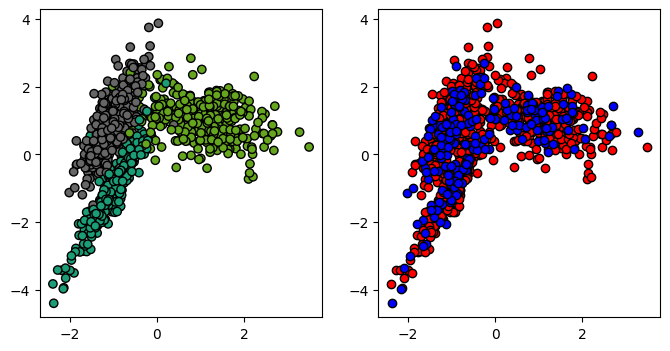

In [2]:
# we create 100 separable points
X, y = make_classification(n_samples = 1000, n_features=2, n_classes = 3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=6)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Plot train / test data
_, axes = plt.subplots(1, 2, figsize = (8,4))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2', edgecolors = 'k')
axes[1].scatter(X_train[:, 0], X_train[:, 1], c='r', edgecolors='k')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c='b', edgecolor='k')

In [ ]:
'''
    --> Paste your plot_2d_decision_boundaries function here!
'''

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_decision_boundaries(clf, X, y):
    # Crear una malla de puntos para evaluar el modelo
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predecir las etiquetas para cada punto en la malla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Dibujar los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.show()

# Para usar esta función en tu código, simplemente llama a la función pasando tu clasificador y tus datos:
# plot_2d_decision_boundaries(clf, X, y)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_decision_boundaries(clf, X, y, n_points=100, ax=None):
    # Crear una malla de puntos para evaluar el modelo
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h_x = (x_max - x_min)/n_points
    h_y = (y_max - y_min)/n_points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x),
                         np.arange(y_min, y_max, h_y))

    # Predecir las etiquetas para cada punto en la malla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar la frontera de decisión
    if ax is None:
        plt.contourf(xx, yy, Z, alpha=0.8)
        # Dibujar los puntos de datos
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
        plt.show()
    else:
        ax.contourf(xx, yy, Z, alpha=0.8)
        # Dibujar los puntos de datos
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Para usar esta función en tu código, simplemente llama a la función pasando tu clasificador, tus datos y el número de puntos:
# plot_2d_decision_boundaries(clf, X, y, n_points=200, ax=ax)


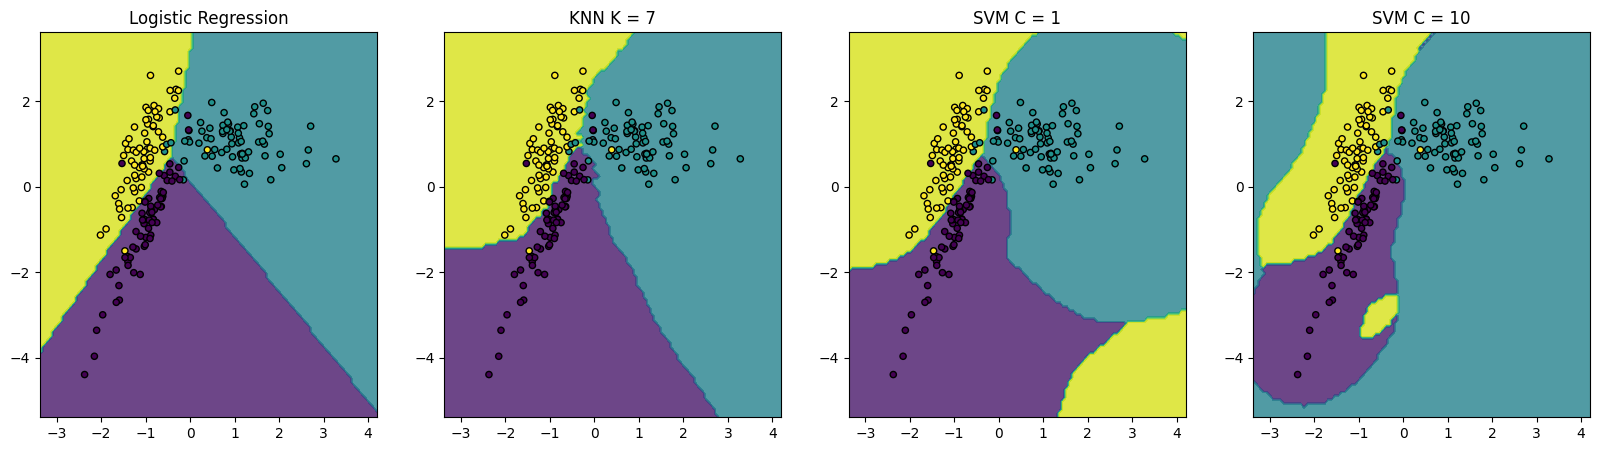

In [5]:
models = [ LogisticRegression(), kNN(n_neighbors=7) , SVC(kernel='rbf', C = 1), SVC(kernel='rbf', C = 10) ]

names = ["Logistic Regression", "KNN K = 7", "SVM C = 1", "SVM C = 10"]

_, axes = plt.subplots(1, len(names), figsize = (5*len(names),5))
predictions = {}

# fit the models
for clf, name, ax in zip(models, names, axes) :
    #
    #clf = _
    clf.fit( X_train , y_train )
    predictions[name]=clf.predict(X_test)
    # Plot everything

    plot_2d_decision_boundaries(clf, X_test, y_test, ax=ax)
    ax.set_title(name)

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.935  	   0.935  	   0.935  	   0.935  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.950  	   0.950  	   0.950  	   0.950  	


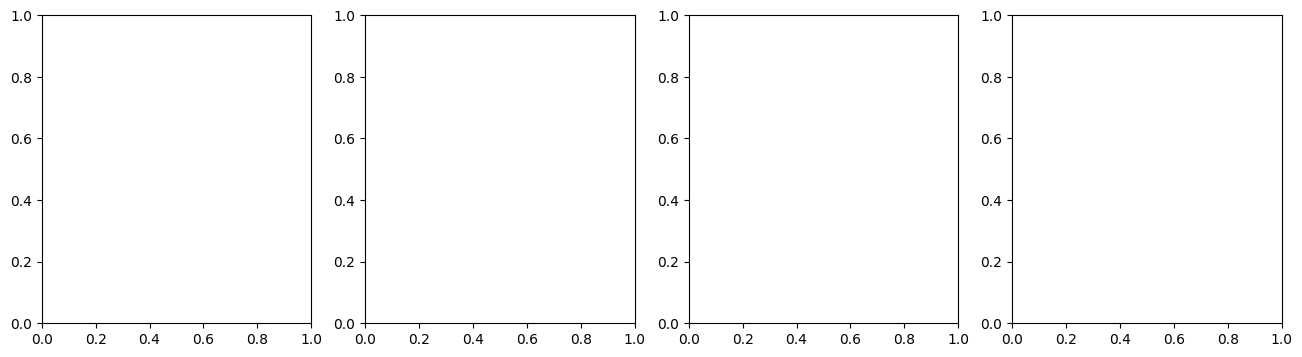

In [7]:
_, axes = plt.subplots(1, len(names), figsize = (4*len(names),4))

# Compute metrics - plot confusion matrix
for name in names :
  print ("########----- Results for {0} -----########".format( _ ))
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title( name )

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


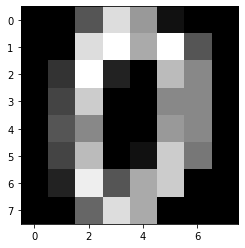

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = _ , noise = _ , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_

In [ ]:
# Train a linear regression



## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE